<a href="https://colab.research.google.com/github/jillianhaig/Project1_DS4002/blob/main/Project1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
! git clone https://github.com/jillianhaig/Project1_DS4002 # so we can access data loaded from shared github repo

fatal: destination path 'Project1_DS4002' already exists and is not an empty directory.


In [12]:
# import necessary packages
import pandas as pd
import seaborn as sns

In [13]:
# vader package
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
# THIS IS A TEST using the squidgame data
squid_df = pd.read_csv('/content/Project1_DS4002/reviews.csv')
squid_df.head()

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...


In [15]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

In [16]:
# Calculate sentiment scores for each review and create a DataFrame
sentiment_df = squid_df['Review_body'].apply(lambda x: pd.Series(get_sentiment(x)))

# Rename the columns of the sentiment DataFrame for clarity
sentiment_df.columns = ['neg', 'neu', 'pos', 'compound']

# Concatenate the sentiment scores with the original DataFrame
squid_df = pd.concat([squid_df, sentiment_df], axis=1)

# Optionally, if you prefer a single column with a dictionary of scores:
# squid_df['sentiment_scores'] = squid_df['Review_Body'].apply(lambda x: get_sentiment(x))

# Display the updated DataFrame
squid_df.head()

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body,neg,neu,pos,compound
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho...",0.189,0.667,0.144,-0.9172
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo...",0.017,0.753,0.230,0.9933
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...,0.054,0.762,0.184,0.9968
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...,0.117,0.734,0.149,0.9326
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...,0.000,0.804,0.196,0.9332


In [17]:
# changing the dates

# Function to convert text date to datetime object
def parse_date(text_date):
    return pd.to_datetime(text_date, format='%d %B %Y')

# Apply function to convert text dates to datetime
squid_df['Review date'] = squid_df['Review date'].apply(parse_date)

# Function to format datetime object to MMDDYYYY
def format_date(date):
    return date.strftime('%m%d%Y')

# Apply function to format datetime objects
squid_df['Review date'] = squid_df['Review date'].apply(format_date)

In [18]:
squid_df.head()

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body,neg,neu,pos,compound
0,0,Leofwine_draca,A new TV classic,10/10,10092021,"Just finished up SQUID GAME, the Korean TV sho...",0.189,0.667,0.144,-0.9172
1,1,kosmasp,Just a game,9/10,10102021,"Well multiple games actually, but even that yo...",0.017,0.753,0.230,0.9933
2,2,Tweekums,Games to die for,10/10,10112021,This runaway hit from South Korea is centred o...,0.054,0.762,0.184,0.9968
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,10092021,I went into this show knowing absolutely nothi...,0.117,0.734,0.149,0.9326
4,4,Irishchatter,It started off strong but ended disoriented,7/10,10082021,I honestly don't know wtf the main character n...,0.000,0.804,0.196,0.9332


In [19]:
# import the data
squid_df = squid_df.sort_values(by='Review date', ascending=True)

In [21]:
squid_df.tail()

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body,neg,neu,pos,compound
6,6,John6Daniels,This puts a smile on my face.,1/10,10152021,"Haha! I don't know if it's Korea, trolls, fanb...",0.044,0.738,0.218,0.9880
883,883,illymflt,"A genocide to denounce a genocide: horrifying,...",8/10,10152021,Brace yourselves: there's a lot to process her...,0.052,0.768,0.180,0.9413
966,966,istvan_b01,"Utterly stupid, complete waste of time.",2/10,10152021,First I thought it was rated by Koreans only w...,0.123,0.773,0.105,0.2559
44,44,root_king,Great show,8/10,10152021,Great show. Korean drama that is perceivable f...,0.000,0.734,0.266,0.9537
712,712,aamirameenkhan,Worst Climax,3/10,10152021,If the winning guy is feeling bad about his fr...,0.164,0.671,0.165,-0.2144


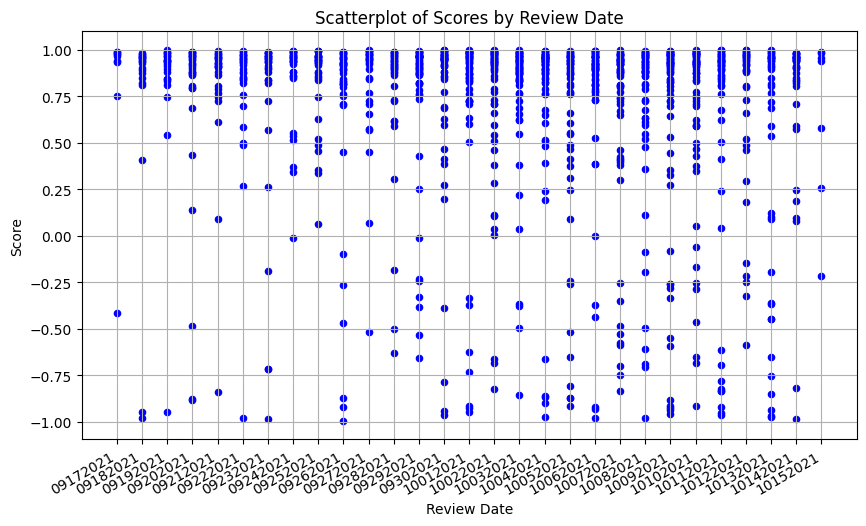

In [22]:
# visualize results
import matplotlib.pyplot as plt

squid_df.plot(kind='scatter', x='Review date', y='compound', color='blue', marker='o', figsize=(10, 6))
plt.title('Scatterplot of Scores by Review Date')
plt.xlabel('Review Date')
plt.ylabel('Score')
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()